In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df=pd.read_csv('/kaggle/input/re-generation-all-india/re-generation all india.csv')

In [4]:
df.head(10)

,DATE,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total(MU)
0,Apr-19,3707.29,4181.23,235.01,1201.29,518.15,38.77,9881.74
1,May-19,6603.94,4342.59,229.03,632.78,592.36,29.37,12430.07
2,Jun-19,8781.15,3931.59,202.28,313.76,665.55,38.23,13932.56
3,Jul-19,11343.60,3438.82,275.22,258.75,831.38,29.03,16176.80
4,Aug-19,9704.01,3587.47,234.16,251.26,1120.48,25.09,14922.47
5,Sep-19,5478.29,3564.79,202.24,234.15,1290.35,26.83,10796.65
6,Oct-19,2111.49,3868.28,249.17,249.75,1110.23,4.18,7593.10
7,Nov-19,2723.82,3936.16,207.67,867.72,830.52,27.57,8593.46
8,Dec-19,3950.78,3924.62,239.10,1857.18,701.69,29.61,10702.98
9,Jan-20,3319.96,4612.56,273.22,1906.93,562.16,23.96,10698.79


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     37 non-null     object 
 1   Wind                     37 non-null     float64
 2   Solar                    37 non-null     float64
 3   Biomass                  37 non-null     float64
 4   Bagasse                  37 non-null     float64
 5   Small Hydel              37 non-null     float64
 6   Others                   37 non-null     float64
 7   RE Generation Total(MU)  37 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.4+ KB


In [7]:
df.dtypes

DATE                        object
Wind                       float64
Solar                      float64
Biomass                    float64
Bagasse                    float64
Small Hydel                float64
Others                     float64
RE Generation Total(MU)    float64
dtype: object

In [8]:
df.describe()

,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total(MU)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,5677.646158,6449.094921,268.018337,1010.462964,856.383659,149.708362,14411.314401
std,2894.216246,2075.432911,46.406204,755.679479,339.647240,82.301754,3198.827942
min,2111.490000,3438.820000,172.310000,138.690000,440.040000,4.180000,7593.100000
25%,3421.810000,4612.560000,234.160000,258.750000,586.206432,38.230000,11648.950000
50%,4126.240000,6122.200000,275.220000,867.720000,698.893526,196.322210,14515.650000
75%,8694.963854,8259.913508,303.080000,1735.140000,1120.480000,210.650000,16906.250000
max,11421.280000,10318.693390,339.710000,2261.974330,1539.560000,229.412142,20883.006630


In [13]:
max_wind_month = df[df['Wind'] == df['Wind'].max()]
max_wind_value = max_wind_month['Wind'].values[0]
max_wind_date = max_wind_month['DATE'].values[0]

print("Month with the highest Wind generation:", max_wind_date)
print("Wind value:", max_wind_value)

max_solar_month = df[df['Solar'] == df['Solar'].max()]
max_solar_value = max_solar_month['Solar'].values[0]
max_solar_date = max_solar_month['DATE'].values[0]

print("Month with the highest Solar generation:", max_solar_date)
print("Solar value:", max_solar_value)

max_biomass_month = df[df['Biomass'] == df['Biomass'].max()]
max_biomass_value = max_biomass_month['Biomass'].values[0]
max_biomass_date = max_biomass_month['DATE'].values[0]

print("Month with the highest Biomass generation:", max_biomass_date)
print("Biomass value:", max_biomass_value)


Month with the highest Wind generation: Jul-21
Wind value: 11421.28
Month with the highest Solar generation: Apr-23
Solar value: 10318.69339
Month with the highest Biomass generation: Mar-22
Biomass value: 339.71


In [16]:
max_RE_month = df[df['RE Generation Total(MU)'] == df['RE Generation Total(MU)'].max()]
max_RE_value = max_RE_month['RE Generation Total(MU)'].values[0]
max_RE_date = max_RE_month['DATE'].values[0]

print("Month with the highest RE generated:", max_wind_date)
print("MAX RE genrated  value:", max_wind_value)


Month with the highest RE generated: May-22
MAX RE genrated  value: 20883.00663


In [23]:
#can be used as a way to calculate the average for 4 seasons in a year divided by months
# for all sectors
selected_months = ['May-19', 'Jun-19', 'Jul-19']
selected_sources = ['Wind', 'Solar', 'Biomass', 'Small Hydel']

for source in selected_sources:
    avg_generation = df[df['DATE'].isin(selected_months)][source].mean()
    print("Average", source, "generation for", ', '.join(selected_months), ":", avg_generation)


Average Wind generation for May-19, Jun-19, Jul-19 : 8909.563333333334
Average Solar generation for May-19, Jun-19, Jul-19 : 3904.3333333333335
Average Biomass generation for May-19, Jun-19, Jul-19 : 235.51
Average Small Hydel generation for May-19, Jun-19, Jul-19 : 696.43


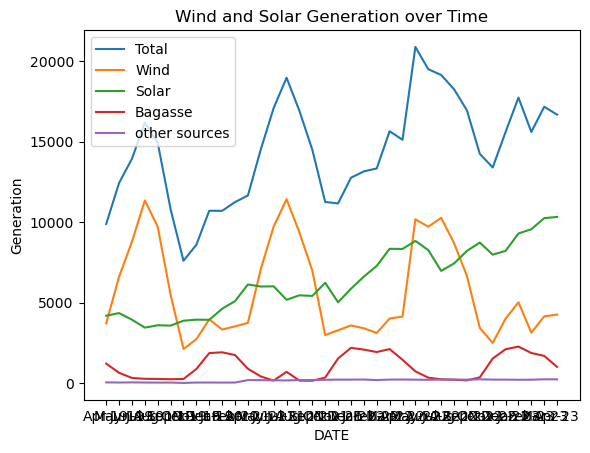

In [31]:

sns.lineplot(data=df,x='DATE',y='RE Generation Total(MU)',label='Total')
sns.lineplot(data=df, x='DATE', y='Wind',label='Wind')
sns.lineplot(data=df, x='DATE', y='Solar',label='Solar')
sns.lineplot(data=df,x='DATE',y='Bagasse',label='Bagasse')
sns.lineplot(data=df,x='DATE',y='Others',label='other sources')
plt.title('Wind and Solar Generation over Time')
plt.xlabel('DATE')
plt.ylabel('Generation')
plt.legend()
plt.show()


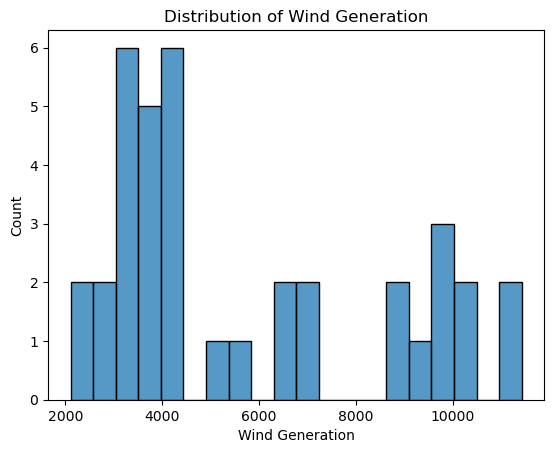

In [27]:


sns.histplot(data=df, x='Wind', bins=20)
plt.title('Distribution of Wind Generation')
plt.xlabel('Wind Generation')
plt.ylabel('Count')
plt.show()


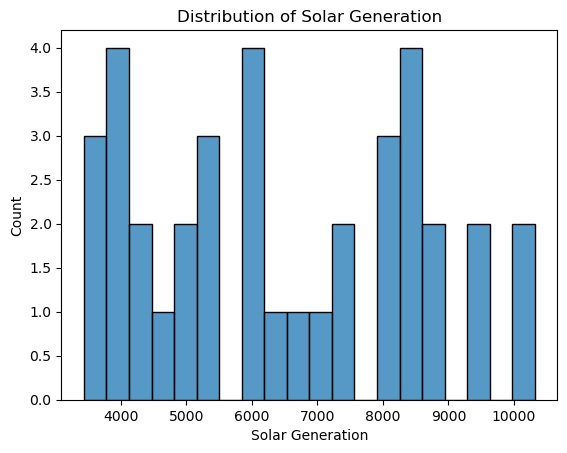

In [28]:


sns.histplot(data=df, x='Solar', bins=20)
plt.title('Distribution of Solar Generation')
plt.xlabel('Solar Generation')
plt.ylabel('Count')
plt.show()


In [32]:
# Area plot for energy sources
fig = px.area(df, x='DATE', y=['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others'], 
              title='Energy Generation by Source over Time')
fig.show()


Double click on individual variable to get the area od individual sectors

In [34]:
# Scatter plot for Wind vs. Solar generation
fig = px.scatter(df, x='Wind', y='Solar', title='Wind vs. Solar Generation')
fig.show()


In [35]:
# Box plot for RE Generation Total
fig = px.box(df, y='RE Generation Total(MU)', title='Box Plot of RE Generation Total')
fig.show()


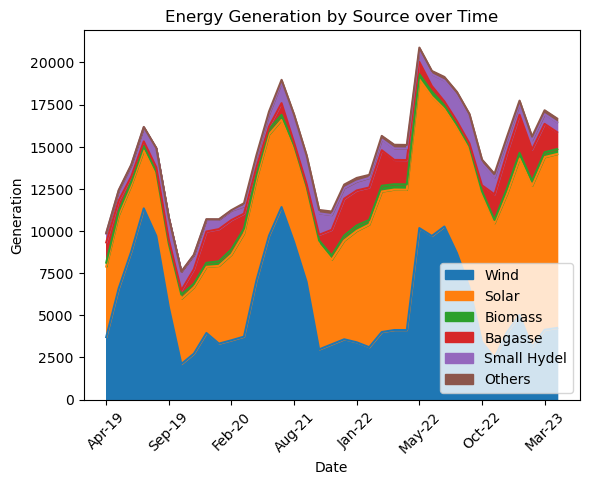

In [38]:
# Area plot for energy sources
df_plot = df.set_index('DATE')
df_plot[['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others']].plot.area(stacked=True)
plt.xlabel('Date')
plt.ylabel('Generation')
plt.title('Energy Generation by Source over Time')
plt.xticks(rotation=45)
plt.show()


In [43]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add trace for Wind generation
fig.add_trace(go.Scatter(x=df['DATE'], y=df['Wind'], name='Wind'))

# Add trace for Solar generation
fig.add_trace(go.Scatter(x=df['DATE'], y=df['Solar'], name='Solar'))

# Set layout options
fig.update_layout(
    title='Wind and Solar Generation over Time',
    xaxis=dict(title='DATE'),
    yaxis=dict(title='Generation'),
    showlegend=True
)

# Show the plot
fig.show()


In [46]:
import plotly.graph_objects as go

categories = ['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=df.loc[df['DATE'] == 'Apr-19', categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='Apr-19'
))

fig.add_trace(go.Scatterpolar(
    r=df.loc[df['DATE'] == 'May-19', categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='May-19'
))

fig.add_trace(go.Scatterpolar(
    r=df.loc[df['DATE'] == 'Jun-19', categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='Jun-19'
))

fig.add_trace(go.Scatterpolar(
    r=df.loc[df['DATE'] == 'Jul-19', categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='Jul-19'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df[categories].max().max()],
        ),
    ),
    showlegend=True,
    title='Renewable Energy Generation by Source',
)

fig.show()
#get the sesonal change in Re

In [47]:
import plotly.graph_objects as go

categories = ['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others']

data = []
for category in categories:
    data.append(df[category])

fig = go.Figure(data=go.Heatmap(
    z=data,
    x=df['DATE'],
    y=categories,
    colorscale='Viridis'))

fig.update_layout(
    title='Renewable Energy Generation by Month and Source',
    xaxis_title='Month',
    yaxis_title='Energy Source')

fig.show()


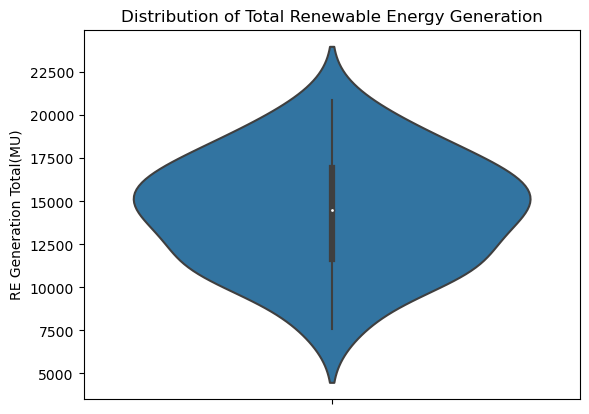

In [48]:
import seaborn as sns

sns.violinplot(data=df, y='RE Generation Total(MU)')
plt.title('Distribution of Total Renewable Energy Generation')
plt.ylabel('RE Generation Total(MU)')

plt.show()


In [49]:
import plotly.graph_objects as go

# Create a bar polar plot
fig = go.Figure(data=go.Barpolar(
    r=df['RE Generation Total(MU)'],
    theta=df['DATE'],
    marker_color='skyblue',
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8,
    hovertext=df['RE Generation Total(MU)'],
))

# Set plot title and layout
fig.update_layout(
    title='Total Renewable Energy Generation',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df['RE Generation Total(MU)'].max()],
        ),
    ),
)

# Show the plot
fig.show()


In [50]:
import plotly.graph_objects as go

# Create a bar polar plot
fig = go.Figure(data=go.Barpolar(
    r=df['Solar'],
    theta=df['DATE'],
    marker_color='skyblue',
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8,
    hovertext=df['Solar'],
))

# Set plot title and layout
fig.update_layout(
    title='Solar RE Distribution',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df['Solar'].max()],
        ),
    ),
)

# Show the plot
fig.show()


In [51]:
import plotly.graph_objects as go

# Create a bar polar plot
fig = go.Figure(data=go.Barpolar(
    r=df['Wind'],
    theta=df['DATE'],
    marker_color='skyblue',
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8,
    hovertext=df['Wind'],
))

# Set plot title and layout
fig.update_layout(
    title='Total Wind Energy Generation',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df['Wind'].max()],
        ),
    ),
)


# Show the plot
fig.show()


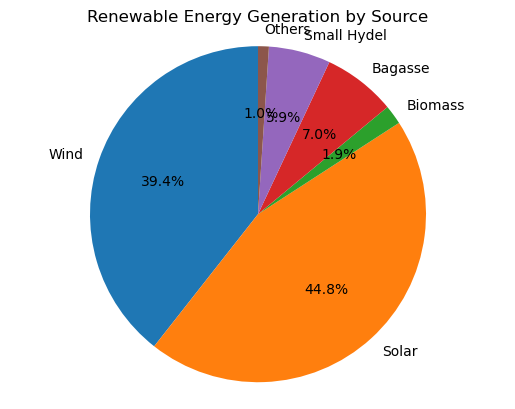

In [52]:


# Prepare the data for the pie chart
labels = ['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others']
sizes = df[['Wind', 'Solar', 'Biomass', 'Bagasse', 'Small Hydel', 'Others']].sum()

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Set plot title
plt.title('Renewable Energy Generation by Source')

# Display the chart
plt.show()
